In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import pickle
from PIL import Image
import umap
from  sklearn.discriminant_analysis  import LinearDiscriminantAnalysis  as LDA
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

In [2]:
filename = 'C:/Users/laleh/Documents/Pythons/projet_blood/tests_images/data_2_355.pkl'
df= pickle.load(open(filename, 'rb'))

# creation de matrice  qui contient tous les images scalees et noir et blanc

In [3]:

filename = 'a_test_blood1_scale5_GO.pkl'

a=pickle.load(open(filename, 'rb'))  # matrice a est crée avec le block suivant

In [7]:
"""
def convert_image(X):
    X_img=[]
    for image in X:
        
        
             with Image.open(image) as im:
                                        
                    s= im.size; 
                    
                    img = im.resize((int(np.sqrt(0.5)*s[0]),int(np.sqrt(0.5)*s[1])), Image.ANTIALIAS)
                    a = np.asarray(img)
                    a=1-a.mean(axis = 2) 
                    
                    
                    b=a.reshape([np.size(a),-1])
                    X_img.append(b) 
                    
                    
    return np.array(X_img)

# Load the images
data=convert_image(df.path)
print(data.shape)
a=data.reshape(1,-1).reshape(data.shape[0],data.shape[1])
pickle.dump(a, open(filename, 'wb')) 
"""

"\ndef convert_image(X):\n    X_img=[]\n    for image in X:\n        \n        \n             with Image.open(image) as im:\n                                        \n                    s= im.size; \n                    \n                    img = im.resize((int(np.sqrt(0.5)*s[0]),int(np.sqrt(0.5)*s[1])), Image.ANTIALIAS)\n                    a = np.asarray(img)\n                    a=1-a.mean(axis = 2) \n                    \n                    \n                    b=a.reshape([np.size(a),-1])\n                    X_img.append(b) \n                    \n                    \n    return np.array(X_img)\n\n# Load the images\ndata=convert_image(df.path)\nprint(data.shape)\na=data.reshape(1,-1).reshape(data.shape[0],data.shape[1])\npickle.dump(a, open(filename, 'wb')) \n"

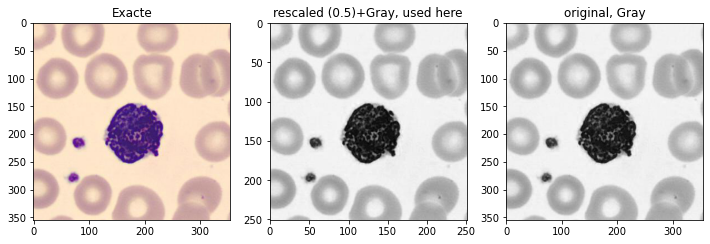

In [8]:
img = plt.imread(df.loc[0,"path"])

plt.figure(figsize=(12,50))
plt.subplot(131)
plt.imshow(img)
plt.title('Exacte')

plt.subplot(132)
plt.imshow(a[0].reshape(int(np.sqrt(a.shape[1])),int(np.sqrt(a.shape[1]))),cmap = 'binary')
plt.title('rescaled (0.5)+Gray, used here')

img_grey2 = 1-img.mean(axis = 2)  #img_grey2=(img[:,:,0]+img[:,:,1]+img[:,:,2])/3
plt.subplot(133)
plt.imshow(img_grey2,cmap = 'binary')
plt.title('original, Gray')


plt.show()

In [4]:

print(a.shape) # conteient tous les données apres scaling

(17092, 63001)


# methode UMAP + knn, en utilisant y_test

In [11]:
"""
reducer = umap.UMAP()

names=[" ","neutrophil", 'eosinophil','ig',"platelet","erythroblast","monocyte","basophil","lymphocyte"]
df['new_out']=df.label.replace(names[1:], range(8))
embedding = reducer.fit_transform(a,df.new_out)
filename = 'embedding_scale5_test_target.pkl'
pickle.dump(embedding, open(filename, 'wb'))
"""

'\nreducer = umap.UMAP()\nreducer.fit(a)\nnames=[" ","neutrophil", \'eosinophil\',\'ig\',"platelet","erythroblast","monocyte","basophil","lymphocyte"]\ndf[\'new_out\']=df.label.replace(names[1:], range(8))\nembedding = umap.UMAP().fit_transform(a,df.new_out)\nfilename = \'embedding_scale5_test_target.pkl\'\npickle.dump(embedding, open(filename, \'wb\'))\n'

In [4]:

filename = 'embedding_scale5_test_target.pkl'

embedding = pickle.load(open(filename, 'rb'))

In [12]:
embedding.shape


(17092, 2)

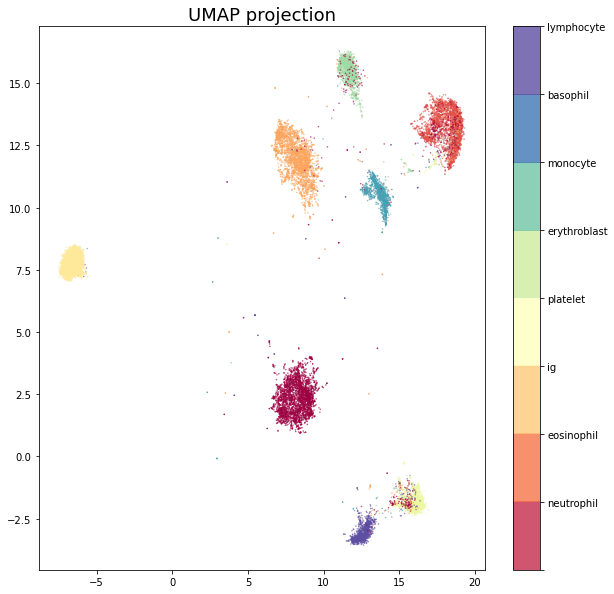

In [5]:

names=[" ","neutrophil", 'eosinophil','ig',"platelet","erythroblast","monocyte","basophil","lymphocyte"]
df['new_out']=df.label.replace(names[1:], range(8))

plt.figure(figsize=(10,10))
cax=plt.scatter(*embedding.T,s=0.2, c=df.new_out.values, cmap='Spectral', alpha=0.8)
cbar = plt.colorbar(cax, ticks=range(9),boundaries=np.arange(9))
cbar.ax.set_yticklabels(names)
plt.title('UMAP projection', fontsize=18);
plt.show()

In [14]:

data=pd.DataFrame(embedding)
target=df['new_out']
X_train, X_test, y_train,y_test=train_test_split(data,target, test_size=0.2, random_state=123)
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=8, metric="minkowski")
knn.fit(X_train, y_train)
knn.score(X_test,y_test)
predictions_knn = knn.predict(X_test)



print(classification_report(y_test,
predictions_knn, target_names=["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte"]))

              precision    recall  f1-score   support

  neutrophil       0.98      0.89      0.93       682
  eosinophil       0.90      0.99      0.94       627
          ig       0.97      0.91      0.94       590
    platelet       0.99      1.00      1.00       449
erythroblast       0.87      0.96      0.91       311
    monocyte       0.93      0.97      0.95       302
    basophil       0.97      0.94      0.95       222
  lymphocyte       0.96      0.95      0.95       236

    accuracy                           0.95      3419
   macro avg       0.95      0.95      0.95      3419
weighted avg       0.95      0.95      0.95      3419



# methode exacte d'usage de umap + knn, sans utiliser y_test 

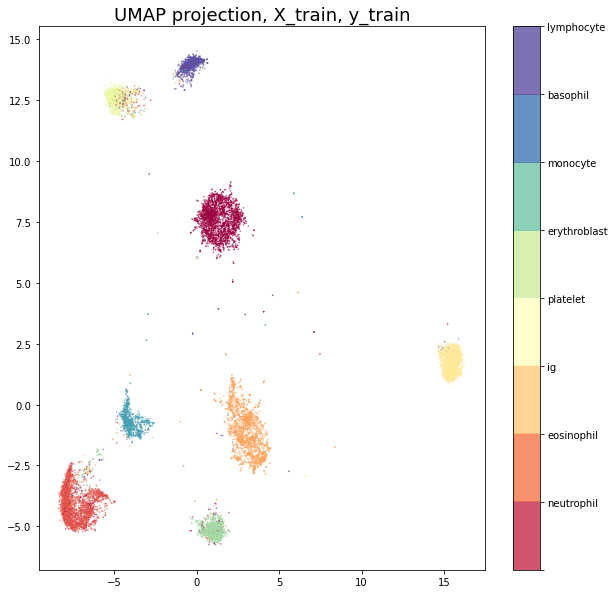

In [6]:
reducer = umap.UMAP()
#reducer.fit(a)
names=[" ","neutrophil", 'eosinophil','ig',"platelet","erythroblast","monocyte","basophil","lymphocyte"]
df['new_out']=df.label.replace(names[1:], range(8))
X_train,X_test,y_train, y_test=train_test_split(a,df['new_out'],test_size=0.2)
names=[" ","neutrophil", 'eosinophil','ig',"platelet","erythroblast","monocyte","basophil","lymphocyte"]

embedding = reducer.fit_transform(X_train,y_train)
filename = 'embedding_scale5_test_target_exact.pkl'
pickle.dump(embedding, open(filename, 'wb'))


plt.figure(figsize=(10,10))
cax=plt.scatter(*embedding.T,s=0.2, c=y_train.values, cmap='Spectral', alpha=0.8)
cbar = plt.colorbar(cax, ticks=range(9),boundaries=np.arange(9))
cbar.ax.set_yticklabels(names)
plt.title('UMAP projection, X_train, y_train', fontsize=18);
plt.show()

In [8]:
X_train2=pd.DataFrame(embedding)  # tester avec n_neighbors=3,5,8, resultat bon seul pour platelet
y_train2=y_train
X_test2=reducer.transform(X_test)
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=3, metric="minkowski")
knn.fit(X_train2, y_train2)
predictions_knn2 = knn.predict(X_test2)
print(classification_report(y_test,
predictions_knn2, target_names=["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte"]))

              precision    recall  f1-score   support

  neutrophil       0.33      0.19      0.24       649
  eosinophil       0.55      0.58      0.56       651
          ig       0.31      0.19      0.23       562
    platelet       0.98      0.97      0.97       462
erythroblast       0.48      0.65      0.55       299
    monocyte       0.29      0.50      0.37       323
    basophil       0.23      0.33      0.27       238
  lymphocyte       0.25      0.27      0.26       235

    accuracy                           0.45      3419
   macro avg       0.43      0.46      0.43      3419
weighted avg       0.45      0.45      0.44      3419



# methode TSNE + knn (même avec y_test utilisé les reponses pas bonnes)

In [19]:

tsne = TSNE( method = 'barnes_hut')
dataTSNE = tsne.fit_transform(a,df['new_out'])


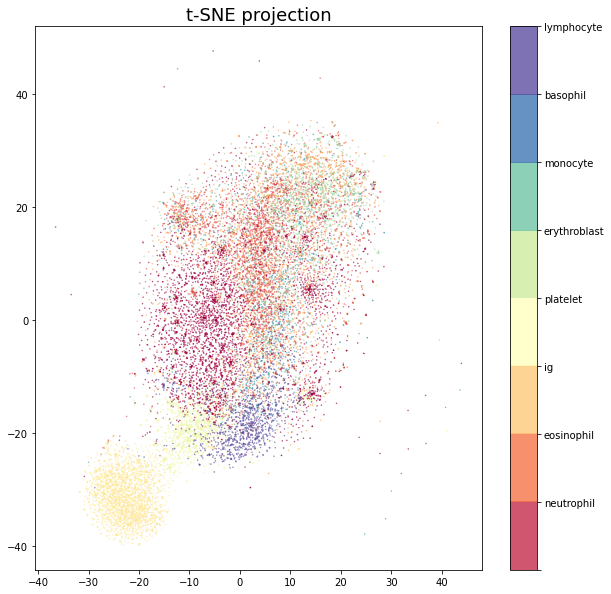

In [20]:
plt.figure(figsize=(10,10))

plt.scatter(dataTSNE[:, 0], dataTSNE[:, 1],  c=df.new_out.values, cmap='Spectral', alpha=0.8, s=0.2)
cbar = plt.colorbar(cax, ticks=range(9),boundaries=np.arange(9))
cbar.ax.set_yticklabels(names)
plt.title('t-SNE projection', fontsize=18);
plt.show()

In [21]:
data2=pd.DataFrame(dataTSNE)
target=df['new_out']
X_train2, X_test2, y_train2,y_test2=train_test_split(data2,target, test_size=0.2, random_state=123)
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=8, metric="minkowski")
knn.fit(X_train2, y_train2)
knn.score(X_test2,y_test2)
predictions2_knn = knn.predict(X_test2)



print(classification_report(y_test2,
predictions2_knn, target_names=["neutrophil","eosinophil","ig","platelet","erythroblast",
                            "monocyte","basophil","lymphocyte"]))

              precision    recall  f1-score   support

  neutrophil       0.65      0.74      0.69       682
  eosinophil       0.49      0.64      0.56       627
          ig       0.39      0.34      0.36       590
    platelet       0.96      0.98      0.97       449
erythroblast       0.69      0.63      0.66       311
    monocyte       0.42      0.27      0.33       302
    basophil       0.28      0.22      0.25       222
  lymphocyte       0.66      0.59      0.62       236

    accuracy                           0.59      3419
   macro avg       0.57      0.55      0.56      3419
weighted avg       0.58      0.59      0.58      3419

